# Real Polymers


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
from scipy.constants import c,epsilon_0,e,physical_constants
import json

%config InlineBackend.figure_format = 'retina' 

with open('style.json', 'r') as fp:
    style = json.load(fp)
    
plt.rcParams.update(style) 

We want to look at properties of real polymers in the following, which means that we have to incorporate interactions between monomers, which are of finite size and also have interactions with the solvent. We will do that in a mean field model introducing the so-called Mayer f-function.

## Mayer f-function and excluded volume

Consider for that purpose the interaction by two monomers in a solvent with an effective potential $U(r)$. This potential typically has some large repulsive component at very short distances, some attractive components (negative) at intermediate length scales and a zero value at very large length scales. 

![Interaction](img/interaction.png)

### Interaction potential

The plots below show some example interaction potentials. The left graph displays the Lennard-Jones potential, the right one the ghard sphere potential, which is also called an athermal potential, as there is no temperature in it due to the missing minimum. 

Note again, that this potential includes all effects of the solvent asl well.

In [4]:
def LJ(eps,sig,r):
    return(4*eps*((sig/r)**12-(sig/r)**6))    

In [48]:
r=np.linspace(0.1,10,100)

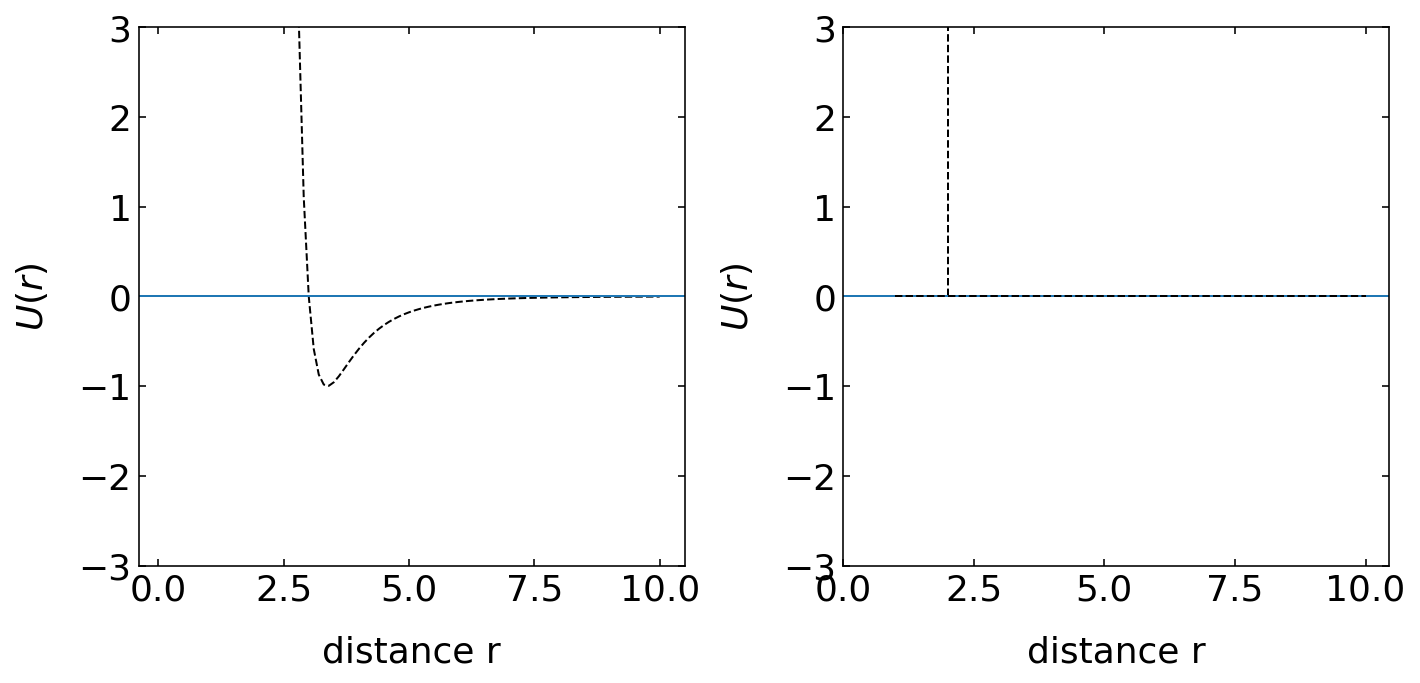

In [49]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(r,LJ(1,3,r),'k--')
plt.ylim(-3,3)
plt.axhline(y=0)
plt.xlabel("distance r")
plt.ylabel(r"$U(r)$")
plt.subplot(122)
plt.plot([2,2],[0,3],'k--')
plt.axhline(y=0)
plt.plot([1,10],[0,0],'k--')
plt.ylim(-3,3)
plt.xlim(0)
plt.xlabel("distance r")
plt.ylabel(r"$U(r)$")
plt.tight_layout()
plt.show()

### Probability distribution

The probability distribution for finding the the monomers at a certain distance $r$ is then given by the Boltzman factor 

\begin{equation}
p(r)=\exp\left (-\frac{U(r)}{k_B T}\right)
\end{equation}

For the two potentials shown above, the probability therefore is zero wherever the potential is infinitely large. Whenever the potential is zero we find a probability density value of 1 while it is larger than 1 in the regions, where the potential is attractive. 

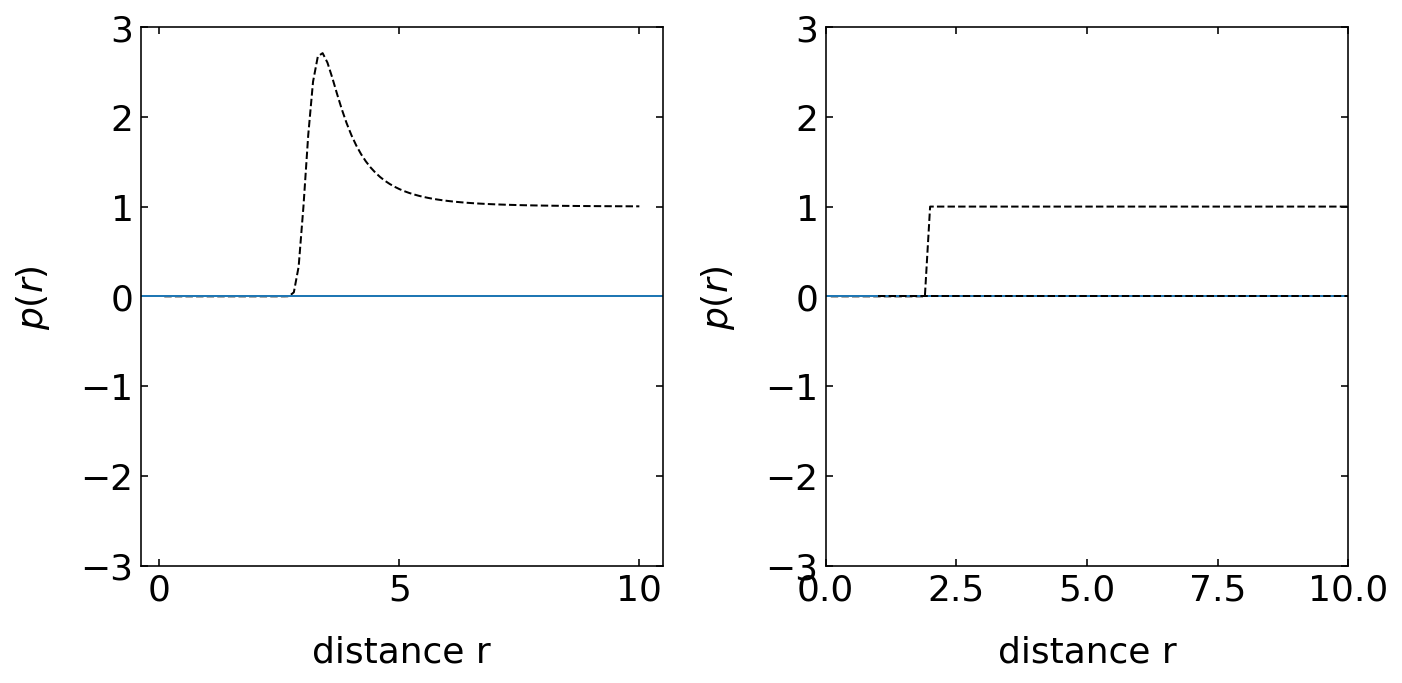

In [50]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(r,np.exp(-LJ(1,3,r)),'k--')
plt.ylim(-3,3)
plt.axhline(y=0)
plt.xlabel("distance r")
plt.ylabel(r"$p(r)$")
plt.subplot(122)
plt.plot(r,np.heaviside(r-2,1),'k--')
plt.axhline(y=0)
plt.plot([1,10],[0,0],'k--')
plt.ylim(-3,3)
plt.xlim(0,10)
plt.xlabel("distance r")
plt.ylabel(r"$p(r)$")
plt.tight_layout()
plt.show()

### Mayer f-function

The Mayer f-function measures now the deviation of the probability from the regions where the potential is zero or the probability density gives 1. It is defined by

\begin{equation}
f(r)=\exp\left (-\frac{U(r)}{k_B T}\right)-1 \tag{Mayer f-function}
\end{equation}

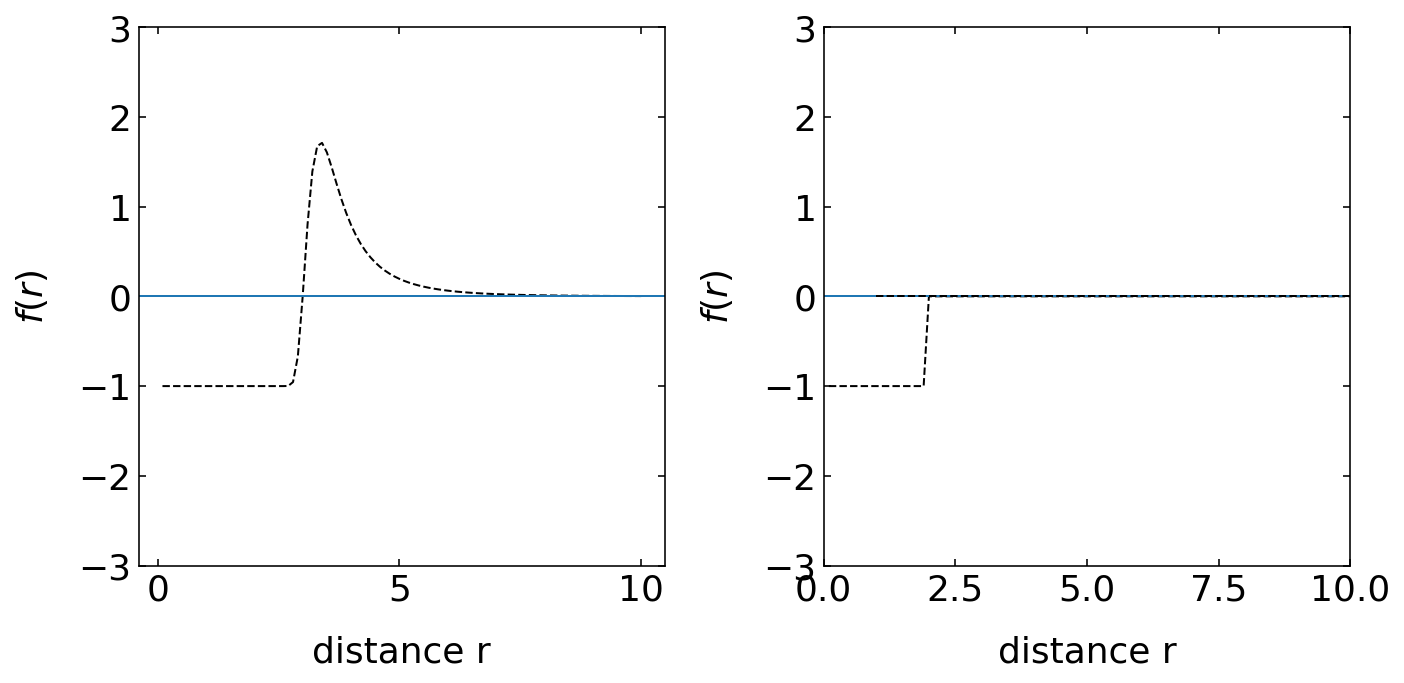

In [53]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(r,np.exp(-LJ(1,3,r))-1,'k--')
plt.ylim(-3,3)
plt.axhline(y=0)
plt.xlabel("distance r")
plt.ylabel(r"$f(r)$")
plt.subplot(122)
plt.plot(r,np.heaviside(r-2,1)-1,'k--')
plt.axhline(y=0)
plt.plot([1,10],[0,0],'k--')
plt.ylim(-3,3)
plt.xlim(0,10)
plt.xlabel("distance r")
plt.ylabel(r"$f(r)$")
plt.tight_layout()
plt.show()

This definition makes sense if we consider the right example of a hard sphere interaction. The free volume can then be calculated by 


\begin{equation}
v=-\int f(r)d^3r=\int 1-\exp\left (-\frac{U(r)}{k_B T}\right) d^3r
\end{equation}

which is giving in the case of the hard sphere interaction just $4\pi R^3/3$, where R is the contact separation distance of the two spheres.
Thus the volume integral over the Mayer f-function is directly giving the excluded volume for the pairwise interaction. Note that the excluded volume can also be negative. This happens, when the attractive interaction is very strong. It can also be zero, when both positive and negative areas under the Mayer f-function are of the same size. 

### Polymer chain as a real gas

Our further calculations will now base the excluded volume influence on the conformation of a polymer chain on the assumtion that all monomers (or actually Kuhn segments) are independet and not correlation in their position. They will thus behave like a real gas and show effect which we know from the **van der Waals gas**, such as co-volume and cohesive pressure. The two effects are actually corrections to the equation of state of the **ideal gas**, which can be written as

\begin{equation}
Z\equiv = \frac{pV_m}{R T}=1 \tag{compressibility factor}
\end{equation}

where $p$ is the pressure, $V_m$ the molar volume and $R$ is the gas constant, i.e. $R=k_B N_A$. For a real gas, the corrections have to scale with the density of the objects $\rho=1/V_m$ and we can write the compressibility factor as a Taylor series expansion

\begin{equation}
Z=\frac{pV_m}{R T}= 1+ B(T)\rho +C(T)\rho^2 + D(T)\rho^3+\ldots \tag{virial expansion}
\end{equation}

which is the viral expansion of the compressibility factor for a real gas. The coefficients $B(T),C(T),D(T)$ are called the viral expansion coefficient. 

Let's have a look at the first one in the case of a van der Waals gas, which is $B(T)$. The presure of a vand der Waals gas reads

\begin{equation}
p=\frac{RT}{(V_m-b)}-\frac{a}{V_m^2}
\end{equation}

where $b$ denotes the co-volume (the volume taken by the molecules themselves) and $a$ amounts for the cohesive pressure of the gas molecules. If we set $a=0$ we can write the compressibility factor 

\begin{equation}
Z=\frac{PV_m}{RT}=\frac{1}{1-\frac{b}{V_m}}
\end{equation}


For $b/V_m<1$, we can do a Taylor expansion which yields

\begin{equation}
Z=1+b\frac{1}{V_m}+b^2\frac{1}{V_m^2}+\ldots=1+b\rho +b^2 \rho^2 + \ldots
\end{equation}

Comparing with the virial expansion above yields the fact that the virial expansion coefficient 

$$
B(T)=b
$$

where b was the molar co-volume in the van der Waals equation, e.g. the excluded volume. Correspondingly, the virial expansion coefficient is given by the integral over the Mayer f-function, i.e. in spherical coordinates


$$
B(T)=-\int f(r)d^3r=-4 \pi \int_{0}^{\infty}\left(e^{-\frac{U(r)}{k_B T}}-1\right) r^{2} d^3r
$$

Using this relation, we have a way to introduce the monomer-monomer and monomer-solvent interaction that is hidden in the May f-function into the equation of state of a real gas of polymer segements. We will come back to this solution.


## Free energy of interaction of a real chain